# **BANK NOTE ANALYSIS**

![image](Cover_maybe.jpg)

In [2]:
from pyforest import*

In [3]:
lazy_imports()

['import awswrangler as wr',
 'import statsmodels.api as sm',
 'from sklearn.linear_model import LinearRegression',
 'from sklearn.preprocessing import MinMaxScaler',
 'from scipy import signal as sg',
 'import lightgbm as lgb',
 'import dash',
 'from xlrd import open_workbook',
 'from sklearn.decomposition import PCA',
 'from sklearn.preprocessing import StandardScaler',
 'from sklearn.manifold import TSNE',
 'from sklearn.feature_extraction.text import CountVectorizer',
 'from sklearn.model_selection import GridSearchCV',
 'import plotly as py',
 'from sklearn.preprocessing import PolynomialFeatures',
 'from sklearn.linear_model import RidgeCV',
 'import spacy',
 'import plotly.express as px',
 'from sklearn.feature_extraction.text import TfidfVectorizer',
 'import glob',
 'from statsmodels.tsa.arima_model import ARIMA',
 'import matplotlib as mpl',
 'from openpyxl import load_workbook',
 'from sklearn.linear_model import Ridge',
 'import fbprophet',
 'import imutils',
 'import sklea

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv("BankNote_Authentication+(1).csv")

<IPython.core.display.Javascript object>

In [6]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [7]:
df.shape

(1372, 5)

In [8]:
df['class'].value_counts() #balanced dataset (learn more about up and down sampling)

0    762
1    610
Name: class, dtype: int64

In [9]:
df.isna().sum() #No null values

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [10]:
df.dtypes #no objects

variance    float64
skewness    float64
curtosis    float64
entropy     float64
class         int64
dtype: object

In [11]:
df.corr()

,variance,skewness,curtosis,entropy,class
variance,1.000000,0.264026,-0.380850,0.276817,-0.724843
skewness,0.264026,1.000000,-0.786895,-0.526321,-0.444688
curtosis,-0.380850,-0.786895,1.000000,0.318841,0.155883
entropy,0.276817,-0.526321,0.318841,1.000000,-0.023424
class,-0.724843,-0.444688,0.155883,-0.023424,1.000000


## DATA VISUALIZATION

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

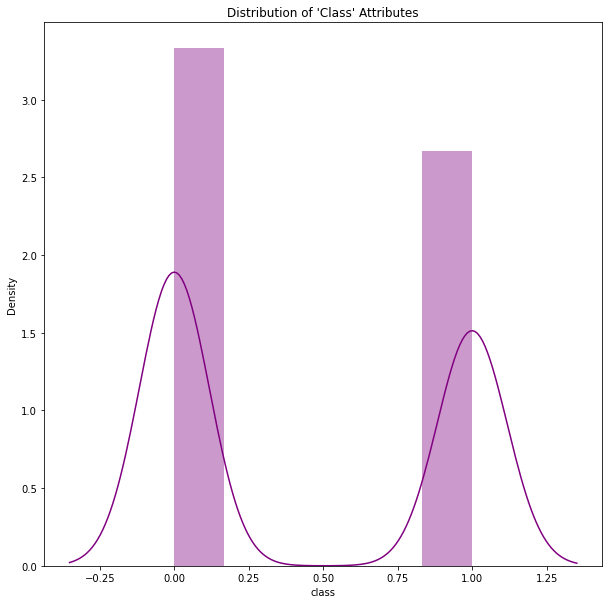

In [12]:
plt.figure(figsize=(10,10))
plt.title("Distribution of 'Class' Attributes")
sns.distplot(df['class'],color='Purple')
plt.show()

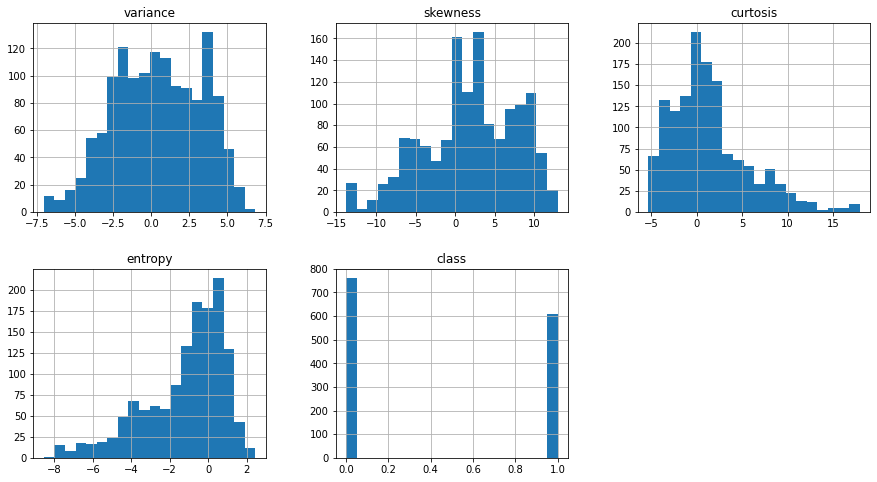

In [13]:
df.hist(bins=20,figsize=(15,8),layout=(2,3));

<IPython.core.display.Javascript object>

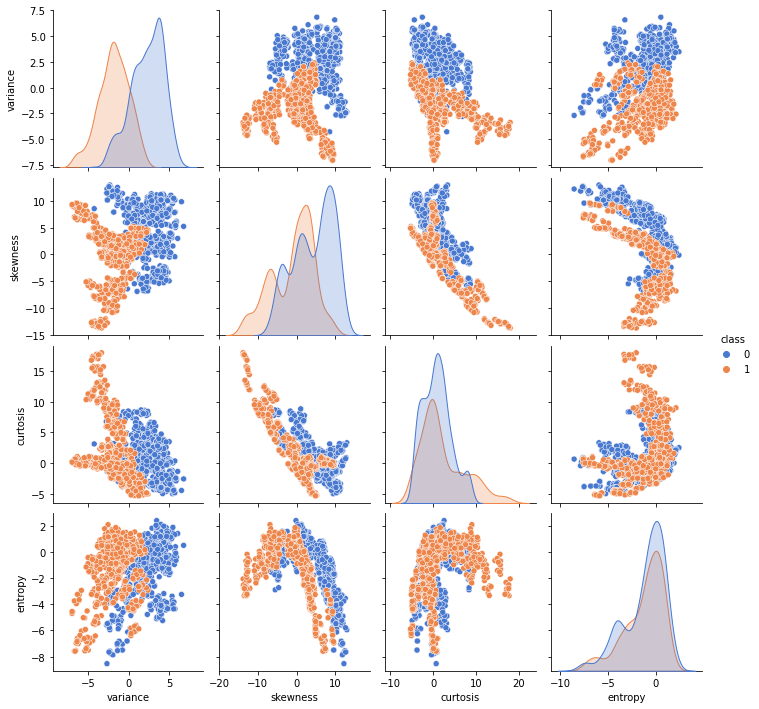

In [14]:
sns.pairplot(df,hue='class',palette='muted')

## Splitting the Dataset

In [15]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [16]:
X=df.drop('class',axis=1)
y=df['class']

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

<IPython.core.display.Javascript object>

In [18]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

X=scaler.fit_transform(X)
X_train=scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)

In [19]:
X_train

array([[-1.58438248,  0.1072115 , -0.14276339,  0.03334576],
       [-1.08829139, -2.53123321,  2.67783284, -0.35092979],
       [ 1.13672843, -0.15348755, -0.16820608,  0.86368769],
       ...,
       [-1.6900361 ,  0.72314447, -0.19588896, -2.05114485],
       [ 0.57766241,  0.02698182,  0.1851622 ,  0.52080477],
       [-0.9644631 ,  0.30908695, -0.49734797, -0.03521515]])

In [20]:
X_test

array([[-1.40564511, -0.03629527, -0.25946279, -0.55356298],
       [ 0.27456924,  0.39719812,  0.19050204,  0.69982149],
       [-1.56677623, -1.70567084,  2.36049857, -0.08188265],
       ...,
       [ 0.33303672,  0.90277959, -0.894603  ,  0.10774845],
       [ 0.24291663, -0.00314587, -0.98169159,  0.65423293],
       [ 0.44734548,  0.89770987, -0.5083209 , -0.56573811]])

## **MODEL BUILDING**

## Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [22]:
classifier1=LogisticRegression(solver='liblinear',random_state=1)
classifier1.fit(X_train,y_train)

acc= cross_val_score(estimator=classifier1,X=X_train,y=y_train,cv=10)
print("\nAccuracies :")
print("..."*10)
print(acc)


Accuracies :
..............................
[0.98181818 0.99090909 0.98181818 0.99090909 0.99090909 0.99090909
 0.96363636 0.99082569 0.97247706 0.98165138]


In [23]:
print("\nMean Accuracy : ",acc.mean())


Mean Accuracy :  0.9835863219349459


In [24]:
classifier1_pred=classifier1.predict(X_test)
classifier1_pred

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

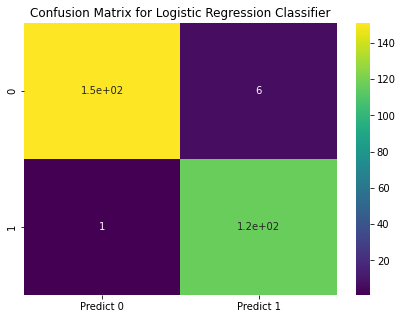

In [25]:
from sklearn import metrics

ConfM=metrics.confusion_matrix(y_test,classifier1_pred,labels=[0,1])

df_ConfM=pd.DataFrame(ConfM,index=[i for i in [0,1]], columns=[i for i in ["Predict 0","Predict 1"]])

plt.figure(figsize=(7,5))
plt.title("Confusion Matrix for Logistic Regression Classifier")
sns.heatmap(df_ConfM,annot=True,cmap='viridis')
plt.show()

## SUPPORT VECTOR CLASSIFIER

In [26]:
from sklearn.svm import SVC

svm_classifier=SVC(kernel='linear')
svm_classifier.fit(X_train,y_train)
svm_acc=cross_val_score(estimator=svm_classifier,X=X_train,y=y_train,cv=10)

print("\nAccuracies :")
print("..."*10)
print(svm_acc)


Accuracies :
..............................
[0.99090909 0.99090909 0.99090909 0.99090909 0.99090909 0.99090909
 0.96363636 0.99082569 0.97247706 0.98165138]


In [27]:
print("\nMean Accuracy : ",svm_acc.mean())


Mean Accuracy :  0.9854045037531277


In [28]:
svm_classifier_pred=svm_classifier.predict(X_test)
svm_classifier_pred

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

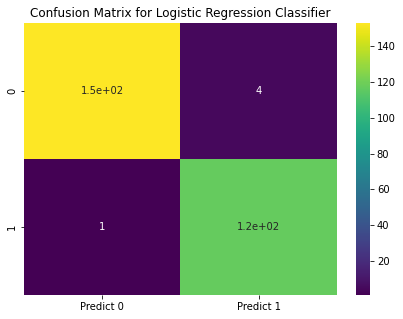

In [29]:
ConfM=metrics.confusion_matrix(y_test,svm_classifier_pred,labels=[0,1])

df_ConfM=pd.DataFrame(ConfM,index=[i for i in [0,1]], columns=[i for i in ["Predict 0","Predict 1"]])

plt.figure(figsize=(7,5))
plt.title("Confusion Matrix for Logistic Regression Classifier")
sns.heatmap(df_ConfM,annot=True,cmap='viridis')
plt.show()

### Example of Overfiiting

In [30]:
rbf_classifier=SVC(kernel='rbf')
rbf_classifier.fit(X_train,y_train)
rbf_acc=cross_val_score(estimator=rbf_classifier,X=X_train,y=y_train,cv=10)

print("\nAccuracies :")
print("..."*10)
print(rbf_acc)


Accuracies :
..............................
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [31]:
rbf_classifier_pred=rbf_classifier.predict(X_test)
rbf_classifier_pred

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

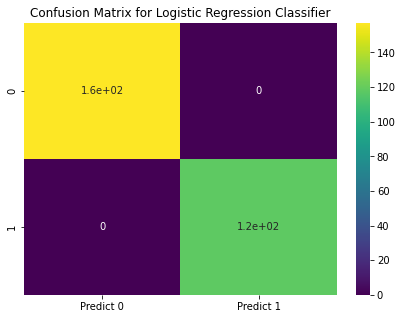

In [32]:
ConfM=metrics.confusion_matrix(y_test,rbf_classifier_pred,labels=[0,1])

df_ConfM=pd.DataFrame(ConfM,index=[i for i in [0,1]], columns=[i for i in ["Predict 0","Predict 1"]])

plt.figure(figsize=(7,5))
plt.title("Confusion Matrix for Logistic Regression Classifier")
sns.heatmap(df_ConfM,annot=True,cmap='viridis')
plt.show()

## Random Forest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier

rfc_classifier=RandomForestClassifier(n_estimators=50,criterion='entropy',random_state=1)
rfc_classifier.fit(X_train,y_train)
rfc_acc=cross_val_score(estimator=rfc_classifier,X=X_train,y=y_train,cv=10)

print("\nAccuracies :")
print("..."*10)
print(rfc_acc)



Accuracies :
..............................
[0.98181818 0.99090909 0.99090909 0.98181818 0.99090909 0.99090909
 1.         1.         1.         1.        ]


In [34]:
print("\nMean Accuracy : ",rfc_acc.mean())


Mean Accuracy :  0.9927272727272728


In [35]:
rfc_classifier_pred=rfc_classifier.predict(X_test)
rfc_classifier_pred

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

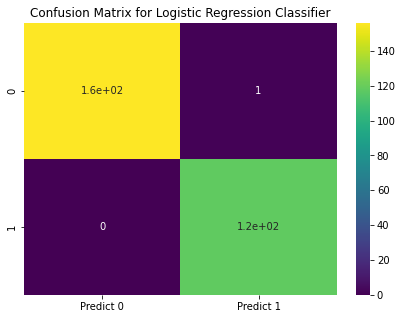

In [36]:
ConfM=metrics.confusion_matrix(y_test,rfc_classifier_pred,labels=[0,1])

df_ConfM=pd.DataFrame(ConfM,index=[i for i in [0,1]], columns=[i for i in ["Predict 0","Predict 1"]])

plt.figure(figsize=(7,5))
plt.title("Confusion Matrix for Logistic Regression Classifier")
sns.heatmap(df_ConfM,annot=True,cmap='viridis')
plt.show()

## KNeighboursClassifier

In [37]:
from sklearn.neighbors import KNeighborsClassifier
#GridCV not working need to figure it out

knn=KNeighborsClassifier(n_neighbors=2,p=1,leaf_size=2)
knn.fit(X_train,y_train)


KNeighborsClassifier(leaf_size=2, n_neighbors=2, p=1)

In [38]:
knn_pred=knn.predict(X_test)
knn_pred

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

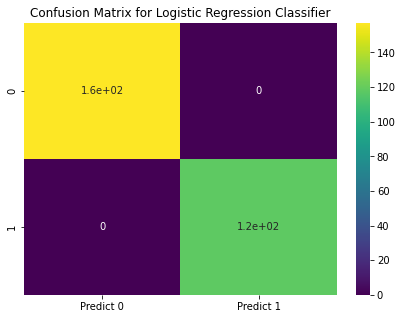

In [39]:
ConfM=metrics.confusion_matrix(y_test,knn_pred,labels=[0,1])

df_ConfM=pd.DataFrame(ConfM,index=[i for i in [0,1]], columns=[i for i in ["Predict 0","Predict 1"]])

plt.figure(figsize=(7,5))
plt.title("Confusion Matrix for Logistic Regression Classifier")
sns.heatmap(df_ConfM,annot=True,cmap='viridis')
plt.show()

#Possibility of overfitting

In [40]:
knn_acc=cross_val_score(estimator=knn,X=X_train,y=y_train,cv=10)

print("\nAccuracies :")
print("..."*10)
print(knn_acc)
print("\nMean Accuracy : ",rfc_acc.mean())


Accuracies :
..............................
[0.99090909 0.99090909 0.99090909 1.         1.         1.
 1.         1.         1.         1.        ]

Mean Accuracy :  0.9927272727272728


### Printing the 'Accuracy' of each Algorithm

In [41]:
print("Logistic Regression: ",acc.mean())
print("Support Vector Classifier(kernel:linear): ",svm_acc.mean())
print("Support Vector Classifier(kenel:rbf): ",rbf_acc.mean())
print("Random Forest Classifier: ",rfc_acc.mean())
print("KNeighbours Classifier: ",knn_acc.mean())

Logistic Regression:  0.9835863219349459
Support Vector Classifier(kernel:linear):  0.9854045037531277
Support Vector Classifier(kenel:rbf):  1.0
Random Forest Classifier:  0.9927272727272728
KNeighbours Classifier:  0.9972727272727273


In [42]:
models_df = pd.DataFrame({"Model": ["Logistic Regression", "Support Vector Classifier(kernel:linear)", "Support Vector Classifier(kenel:rbf)", "Random Forest Classifier", "KNeighbours Classifier"],"Accuracy": [acc.mean(), svm_acc.mean(), rbf_acc.mean(), rfc_acc.mean(), knn_acc.mean()]})

models_df

<IPython.core.display.Javascript object>

,Model,Accuracy
0,Logistic Regression,0.983586
1,Support Vector Classifier(kernel:linear),0.985405
2,Support Vector Classifier(kenel:rbf),1.000000
3,Random Forest Classifier,0.992727
4,KNeighbours Classifier,0.997273


### Conclusion: SVM Classifier (kernel=rbf) gives the best accuracy among all the algorithms.

**NOTE:** It may be overfitting the data.